In [1]:
import keras
import os 
import shutil
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

width = 128
height = 128

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWar

In [2]:
dataset_dir = 'dataset'

x_data = []
y_data = []

# Loop over the six top-level folders
for i in range(0, 6):
    for j in os.listdir(dataset_dir + '/0' + str(i) + '/'):
        # Avoid hidden folders
        if not j.startswith('.'): 
            path = dataset_dir + '/0' + str(i) + '/' + j
            # Put all data into the x_data and y_data arrays
            x_data.append(path)
            y_data.append('0' + str(i))
  
  
# Divide the data into 3 sets
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [3]:
# Path of directory where the divided sets will be
base_dir = 'splitted'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

    # Paths to subset catalogs (training, validation and test set)
    train_dir = os.path.join(base_dir, 'train')
    os.mkdir(train_dir)
    validation_dir = os.path.join(base_dir, 'validation')
    os.mkdir(validation_dir)
    test_dir = os.path.join(base_dir, 'test')
    os.mkdir(test_dir)

In [4]:
# Create label folders (training set)
for i in range(len(y_train)):
    path = os.path.join(train_dir, y_train[i])
    if os.path.isdir(path) == False:
        os.mkdir(path)
    
# Create label folders (validation set)
for i in range(len(y_validate)):
    path = os.path.join(validation_dir, y_validate[i])
    if os.path.isdir(path) == False:
        os.mkdir(path)
        
# Create label folders (test set)
for i in range(len(y_test)):
    path = os.path.join(test_dir, y_test[i])
    if os.path.isdir(path) == False:
        os.mkdir(path)

In [5]:
# Move training images to the new directory
for i in range(len(x_train)):
    path = x_train[i]
    fileName = path[x_train[i].rfind('/')+1:]
    dst = os.path.join(train_dir, y_train[i], fileName)
    shutil.copyfile(x_train[i], dst)

# Move validation images to the new directory
for i in range(len(x_validate)):
    path = x_validate[i]
    fileName = path[x_validate[i].rfind('/')+1:]
    dst = os.path.join(validation_dir, y_validate[i], fileName)
    shutil.copyfile(x_validate[i], dst)
    
# Move test images to the new directory
for i in range(len(x_test)):
    path = x_test[i]
    fileName = path[x_test[i].rfind('/')+1:]
    dst = os.path.join(test_dir, y_test[i], fileName)
    shutil.copyfile(x_test[i], dst)

In [6]:
# Neural network model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)     

In [7]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator(rescale=1./255)

In [8]:
# Convert images to the right form
train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=(height, width),
        color_mode='grayscale',
        batch_size=20,
        class_mode='categorical')

validation_generator = datagen.flow_from_directory(
        validation_dir,
        target_size=(height, width),
        color_mode='grayscale',
        batch_size=20,
        class_mode='categorical')

test_generator = datagen.flow_from_directory(
        test_dir,
        target_size=(height, width),
        color_mode='grayscale',
        batch_size=20,
        class_mode='categorical')

Found 4800 images belonging to 6 classes.
Found 600 images belonging to 6 classes.
Found 600 images belonging to 6 classes.


In [9]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)


Epoch 1/30
100/100 [==============================] - 38s 384ms/step - loss: 0.4887 - accuracy: 0.8435 - val_loss: 0.0297 - val_accuracy: 0.9820
Epoch 2/30
100/100 [==============================] - 37s 369ms/step - loss: 0.0802 - accuracy: 0.9775 - val_loss: 0.2435 - val_accuracy: 0.9710
Epoch 3/30
100/100 [==============================] - 37s 368ms/step - loss: 0.0483 - accuracy: 0.9880 - val_loss: 0.2181 - val_accuracy: 0.9860
Epoch 4/30
100/100 [==============================] - 37s 368ms/step - loss: 0.0296 - accuracy: 0.9915 - val_loss: 4.3920e-04 - val_accuracy: 0.9990
Epoch 5/30
100/100 [==============================] - 37s 368ms/step - loss: 0.0050 - accuracy: 0.9990 - val_loss: 3.1292e-06 - val_accuracy: 0.9980
Epoch 6/30
100/100 [==============================] - 37s 372ms/step - loss: 0.0240 - accuracy: 0.9955 - val_loss: 1.1389e-05 - val_accuracy: 0.9970
Epoch 7/30
100/100 [==============================] - 37s 369ms/step - loss: 0.0216 - accuracy: 0.9965 - val_loss: 5.

In [10]:
model.save('hand_gesture_recognition.h5')

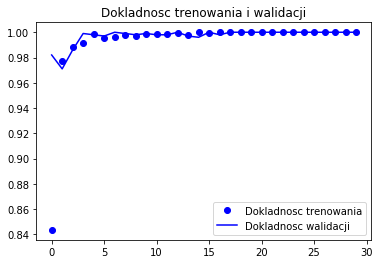

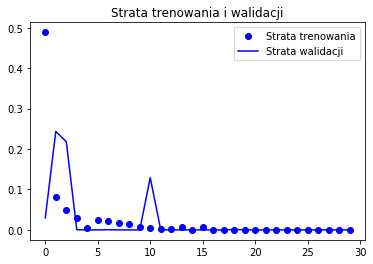

In [11]:
# Plot of loss and accuracy of the model's work
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'b', label='Dokladnosc walidacji')
plt.title('Dokladnosc trenowania i walidacji')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

In [12]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('dokładnosc podczas testowania:', test_acc)

dokładnosc podczas testowania: 0.9959999918937683
